In [3]:
import os
print(os.listdir('evaluation'))


['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
categories = [
    'Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
    'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit'
]

category_to_index = {name: idx for idx, name in enumerate(categories)}
index_to_category = {idx: name for name, idx in category_to_index.items()}

calorie_map = {
    'Bread': 265,
    'Dairy product': 150,
    'Dessert': 300,
    'Egg': 155,
    'Fried food': 400,
    'Meat': 250,
    'Noodles-Pasta': 220,
    'Rice': 130,
    'Seafood': 180,
    'Soup': 100,
    'Vegetable-Fruit': 80
}


In [6]:
IMG_SIZE = 100

def load_images_from_folder(folder_path):
    images = []
    labels = []
    
    for label_name in os.listdir(folder_path):
        sub_folder = os.path.join(folder_path, label_name)
        if os.path.isdir(sub_folder):
            for img_file in os.listdir(sub_folder):
                img_path = os.path.join(sub_folder, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    images.append(img)
                    labels.append(category_to_index[label_name])
                    
    return np.array(images), np.array(labels)


In [8]:
X, y = load_images_from_folder('evaluation')

X = X / 255.0  # Normalize
y_cat = to_categorical(y, num_classes=len(categories))

X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [12]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(categories), activation='softmax')  # Output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.1377 - loss: 2.4740 - val_accuracy: 0.2403 - val_loss: 2.2298
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.2412 - loss: 2.1272 - val_accuracy: 0.2731 - val_loss: 2.0508
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3425 - loss: 1.9112 - val_accuracy: 0.3090 - val_loss: 1.9722
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3999 - loss: 1.6744 - val_accuracy: 0.3179 - val_loss: 2.0008
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5614 - loss: 1.3061 - val_accuracy: 0.3179 - val_loss: 2.0514
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6765 - loss: 1.0255 - val_accuracy: 0.3015 - val_loss: 2.3123
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7579 - loss: 0.7563 - val_accuracy: 0.3134 - val_loss: 2.4478
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8330 - loss: 0.5236 - val_accuracy: 0.2836 - v

In [13]:
def predict_and_estimate(img_path):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_norm = img_resized / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    label = index_to_category[class_idx]
    calories = calorie_map[label]

    print(f"Predicted class: {label}")
    print(f"Estimated calories: {calories} kcal")

    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"{label} - {calories} kcal")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted class: Egg
Estimated calories: 155 kcal


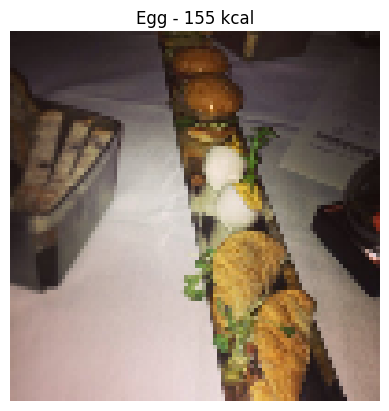

In [14]:
predict_and_estimate('1.jpg')
